<h1 style='text-align: center;'>TP1</h1>
<h1 style='text-align: center;'>La reconnaissance de chiffres manuscrits</h1>

Le but de ce TP est de réaliser différents modèles de réseaux de neurones profonds en utilisant le célèbre ensemble de données MNIST, et de comparer leur précision (accuracy).

### les différentes bibliothèques utilisées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import keras
import cv2


models = ["A","B","C","D"]
list_accuracy = []
list_loss = []


### Lire la base de données MNIST et la séparer en jeux de données d'entraînement et de test.

In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()


In [ ]:
print('Nombre des exemples pour l\'apprentissage :', len(x_train))
print('Nombre des exemples pour le test :', len(x_train))
print('Image dimension :', x_train[0].shape)

Nombre des exemples pour l'apprentissage : 60000
Nombre des exemples pour le test : 60000
Image dimension : (28, 28)


### Normalisation des données

In [ ]:
x_train = x_train/255
x_test = x_test/255

### Redimensionnement
### Transformer le tableau en une dimension


In [ ]:
x_train = x_train.reshape(len(x_train),28*28)
x_test  = x_test.reshape(len(x_test),28*28)

# Modéle A(784,120,10)

### Le modèle est composé de deux couches
### La première couche a 120 neurones et utilise la fonction d'activation sigmoid, Elle prend en entrée des données de dimension 784
### la deuxième couche  a 10 neurones, correspondant au nombre de classes de sortie.

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(120, input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4030 - accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1975 - accuracy: 0.9432
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1458 - accuracy: 0.9575
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1128 - accuracy: 0.9680
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.9745
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0748 - accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0618 - accuracy: 0.9827
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.037

### Évaluer le modèle sur les données de test

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

list_loss.append(loss)
list_accuracy.append(accuracy)

print('Accuracy  :'+str(accuracy))
print('Loss  :'+str(loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9749
Accuracy  :0.9749000072479248
Loss  :0.0760176032781601


### Affichage du Matrice de confusion

313/313 [==============================] - 1s 2ms/step


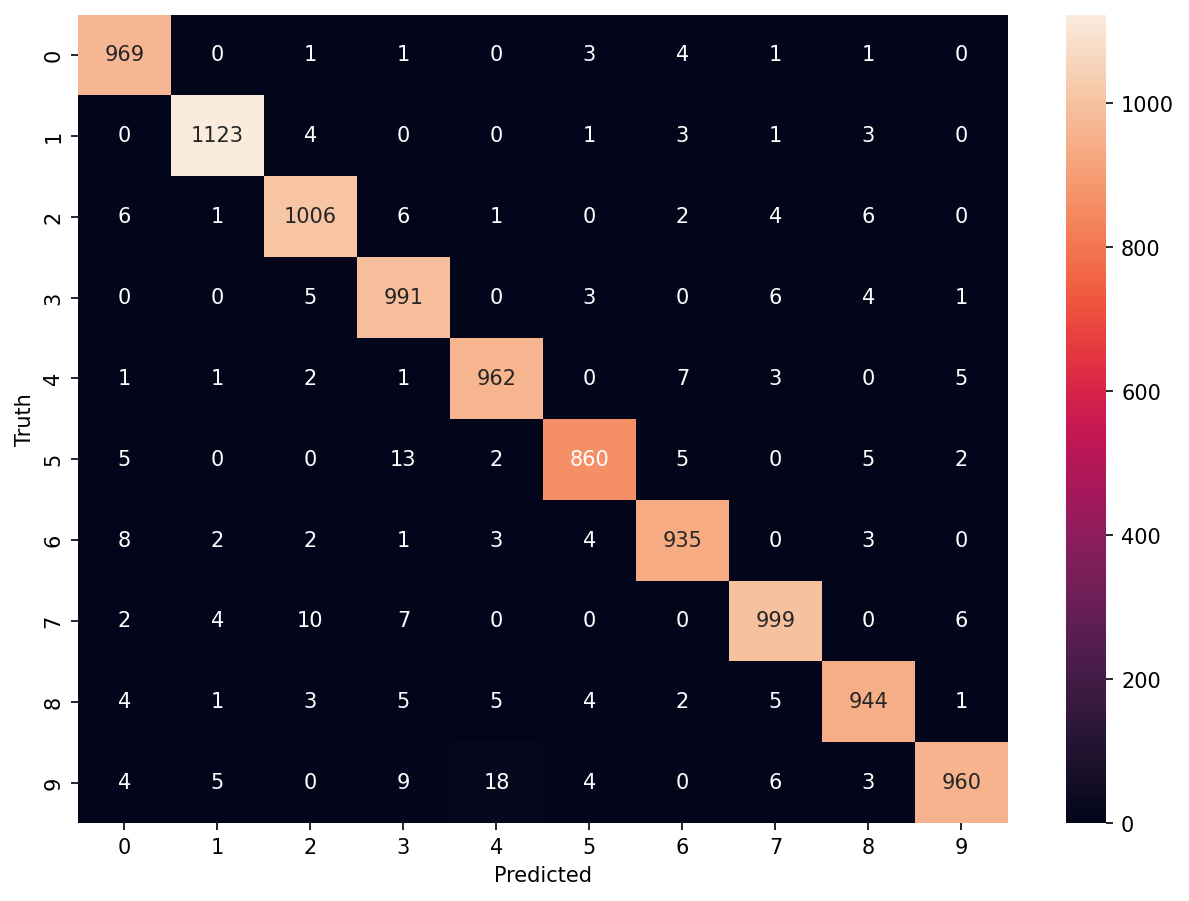

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7),dpi=150)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Modéle B(784,500,120,10)

### Le modèle est composé de trois couches .
### La première couche a 500 neurones et utilise la fonction d'activation sigmoid, Elle prend en entrée des données de dimension 784.
### La deuxième couche a 120 neurones et utilise également la fonction d'activation sigmoid.
### la deuxième couche  a 10 neurones, correspondant au nombre de classes de sortie.

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(120,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3545 - accuracy: 0.9004
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1482 - accuracy: 0.9550
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0969 - accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0677 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0489 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0200 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0156 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step -

### Évaluer le modèle sur les données de test

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

list_loss.append(loss)
list_accuracy.append(accuracy)

print('Accuracy  :'+str(accuracy))
print('Loss  :'+str(loss))

313/313 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9739
Accuracy  :0.9739000201225281
Loss  :0.09576500207185745


### Affichage du Matrice de confusion

313/313 [==============================] - 1s 3ms/step


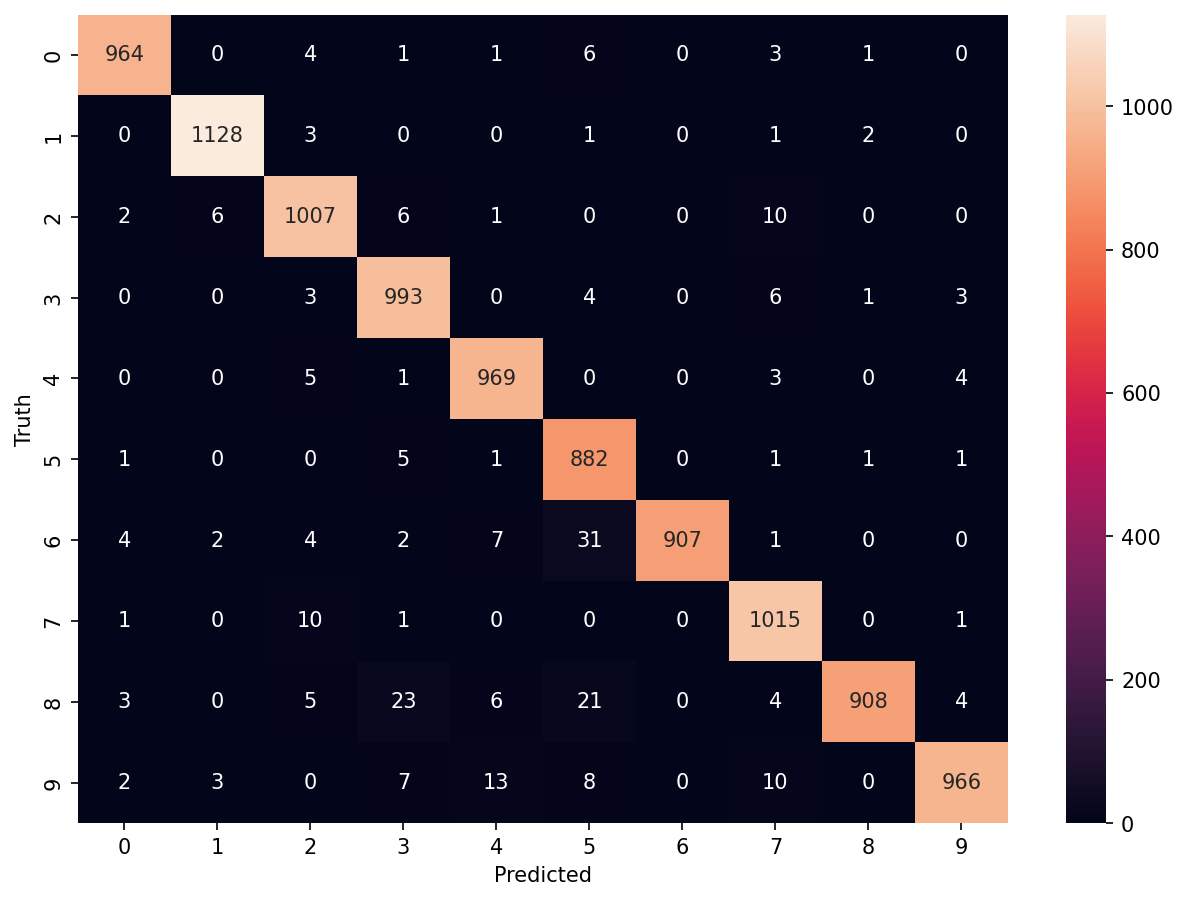

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7),dpi=150)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Modéle C(784,500,120,10) avec RELU

### Le modèle est composé de trois couches .
### La première couche a 500 neurones et utilise la fonction d'activation Relu, Elle prend en entrée des données de dimension 784.
### La deuxième couche a 120 neurones et utilise également la fonction d'activation sigmoid.
### la deuxième couche  a 10 neurones, correspondant au nombre de classes de sortie.

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,),activation='relu'),
    keras.layers.Dense(120,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2215 - accuracy: 0.9365
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0806 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0362 - accuracy: 0.9883
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0269 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0149 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0100 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

### Évaluer le modèle sur les données de test

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

list_loss.append(loss)
list_accuracy.append(accuracy)

print('Accuracy  :'+str(accuracy))
print('Loss  :'+str(loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9827
Accuracy  :0.982699990272522
Loss  :0.07170099020004272


### Affichage du Matrice de confusion

313/313 [==============================] - 1s 2ms/step


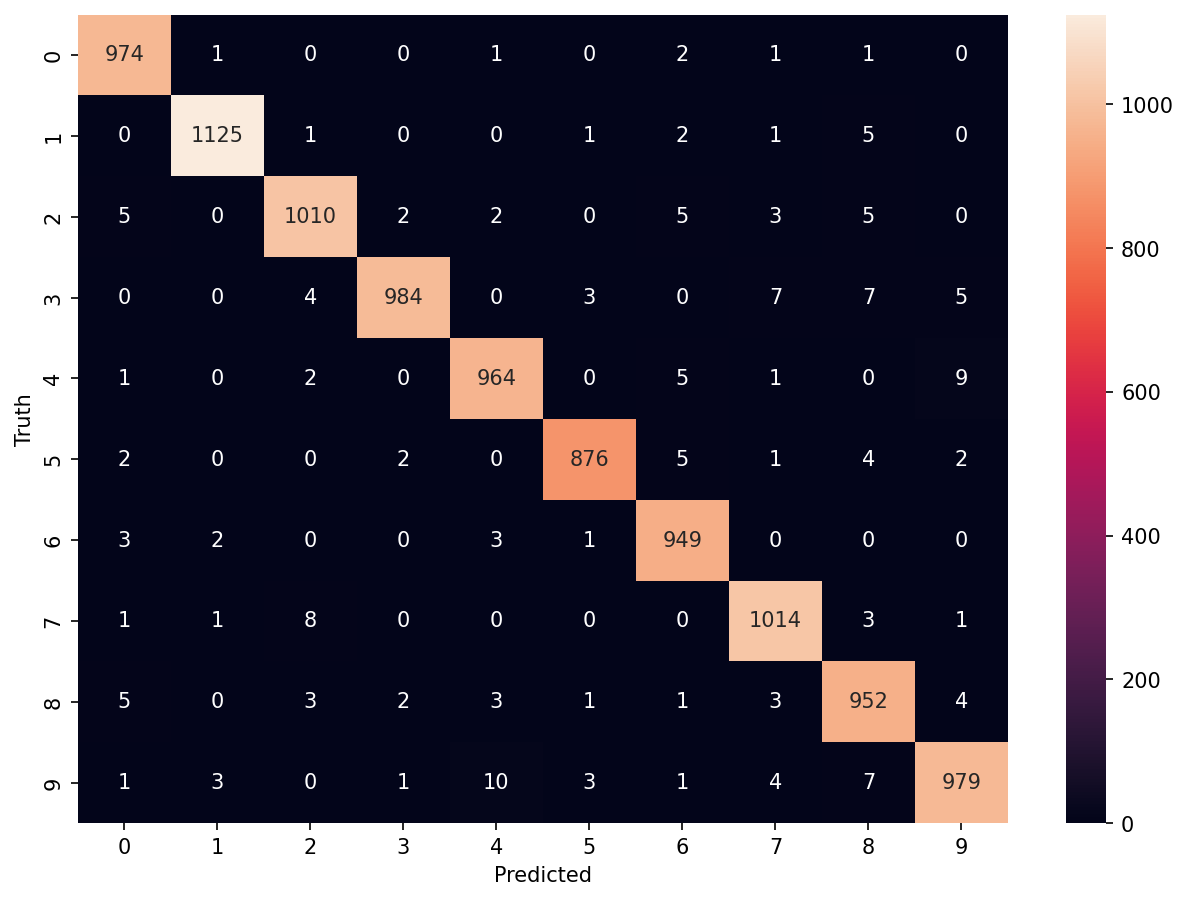

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7),dpi=150)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Modéle D - Binarisation des images

### La binarisation est un processus qui consiste à convertir une image en niveaux de gris ou en couleur en une image composée uniquement de deux couleurs : noir et blanc.

### Fonction de binarisation d'image

In [ ]:
import cv2
import numpy as np

def binarize_image(image, threshold):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)

    return binary_image




threshold = 127


### Lire la base de données MNIST et la séparer en jeux de données d'entraînement et de test.

In [ ]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()


### binarisation des images de test et d'entraînement

In [ ]:
x_train = np.array([binarize_image(image, threshold) for image in x_train])
x_test = np.array([binarize_image(image, threshold) for image in x_test])


### Normalisation des données

In [ ]:

x_train = x_train/255
x_test = x_test/255

### Redimensionnement
### Transformer le tableau en une dimension


In [ ]:
x_train = x_train.reshape(len(x_train),28*28)
x_test  = x_test.reshape(len(x_test),28*28)

### Le modèle est composé de trois couches .
### La première couche a 500 neurones et utilise la fonction d'activation Relu, Elle prend en entrée des données de dimension 784.
### La deuxième couche a 120 neurones et utilise également la fonction d'activation sigmoid.
### la deuxième couche  a 10 neurones, correspondant au nombre de classes de sortie.

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(500, input_shape=(784,),activation='relu'),
    keras.layers.Dense(120,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2344 - accuracy: 0.9327
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0849 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0509 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0327 - accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0169 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0110 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

### Évaluer le modèle sur les données de test


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

list_loss.append(loss)
list_accuracy.append(accuracy)

print('Accuracy  :'+str(accuracy))
print('Loss  :'+str(loss))

313/313 [==============================] - 3s 8ms/step - loss: 0.0916 - accuracy: 0.9785
Accuracy  :0.9785000085830688
Loss  :0.09160484373569489


### Affichage du Matrice de confusion

313/313 [==============================] - 1s 4ms/step


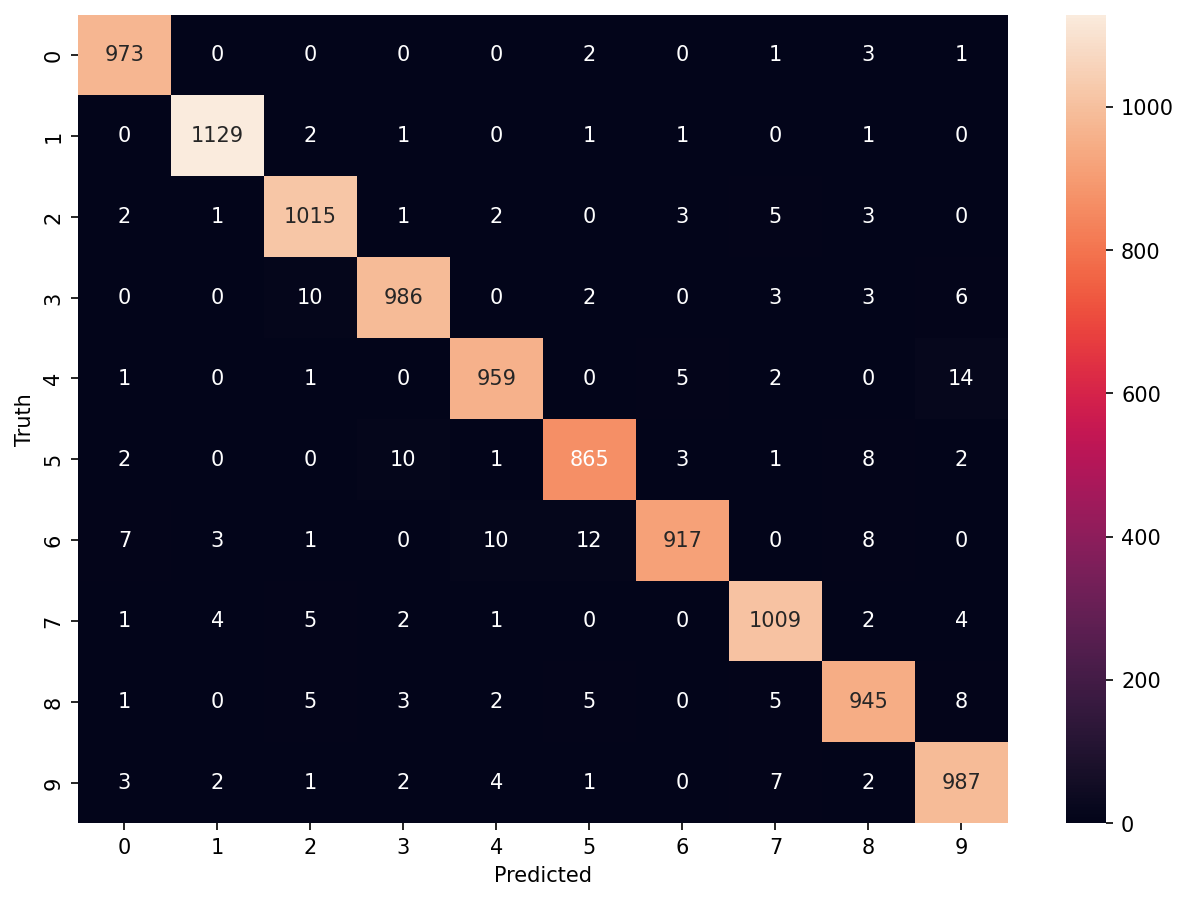

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7),dpi=150)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Comparaison des différents modèle

In [ ]:
list_loss,list_accuracy

([0.0760176032781601,
  0.09576500207185745,
  0.07170099020004272,
  0.09160484373569489],
 [0.9749000072479248,
  0.9739000201225281,
  0.982699990272522,
  0.9785000085830688])

|  Model    | Accuracy |Loss|
|----------|-----|-----|
| A     | 0.9749000072479248  |0.0760176032781601|
| B    | 0.9739000201225281  |0.09576500207185745|
| C  | 0.9739000201225281  |0.07170099020004272|
| D  | 0.9785000085830688  |0.09160484373569489|